Step 1

In [304]:
import pandas as pd
import datetime

In [305]:
mta = pd.read_csv("MTA/turnstile_160109.txt")
mta = mta.head(5000)
#mta

In [306]:
mta['key'] = zip(mta['C/A'], mta['UNIT'], mta['SCP'], mta['STATION'])

In [307]:
mta_dict = {}
mta_dict

{}

In [308]:
for index, row in mta.iterrows():
    value = row[4:11].tolist()
    key = row['key']
    #print key, value
    
    if key in mta_dict:
        mta_dict[key].append(value)
        
    else:
        mta_dict[key] = [value]
        

In [309]:
## Step 1 dictionary:
#mta_dict

Step 2: Time Series

In [310]:
mta['datetime'] = pd.to_datetime(mta.DATE + mta.TIME, format='%m/%d/%Y%H:%M:%S')
#mta

In [311]:
datetime_dict = {}
for index, row in mta.iterrows():
    value = row['datetime'], row['ENTRIES']
    key = row['key']
    #print key, value
    
    if key in datetime_dict:
        datetime_dict[key].append(value)
        
    else:
        datetime_dict[key] = [value]
        

In [312]:
# Step 2 Result:
# print datetime_dict

Step 3

In [313]:
## This function takes a list of DateTime objects with the turnstile counter and calculates each day's entries
## and returns a list of [(date, count)]

def count_day(my_list):
    ## Get unique values of dates
    dates = [row[0].date() for row in my_list]
    dates = set(dates)
    #print dates
    
    result = []
    for date in dates:
        entries = [x[1] for x in my_list if x[0].date() == date]
        result.append((date, max(entries)-min(entries)))
    
    return result
    #print result
    
    
#print count_day(datetime_dict[('A002', 'R051', '02-00-00', '59 ST')])    


In [318]:
import pprint

count_dict = {key:count_day(datetime_dict[key]) for key in datetime_dict}
pprint.pprint(count_dict, width = 100)

{('A002', 'R051', '02-00-00', '59 ST'): [(datetime.date(2016, 1, 4), 1733),
                                         (datetime.date(2016, 1, 5), 1596),
                                         (datetime.date(2016, 1, 8), 1853),
                                         (datetime.date(2016, 1, 2), 1033),
                                         (datetime.date(2016, 1, 3), 737),
                                         (datetime.date(2016, 1, 6), 1733),
                                         (datetime.date(2016, 1, 7), 1783)],
 ('A002', 'R051', '02-00-01', '59 ST'): [(datetime.date(2016, 1, 4), 1508),
                                         (datetime.date(2016, 1, 5), 1423),
                                         (datetime.date(2016, 1, 8), 1489),
                                         (datetime.date(2016, 1, 2), 904),
                                         (datetime.date(2016, 1, 3), 669),
                                         (datetime.date(2016, 1, 6), 1459),
              

-------- Part 4 ---------

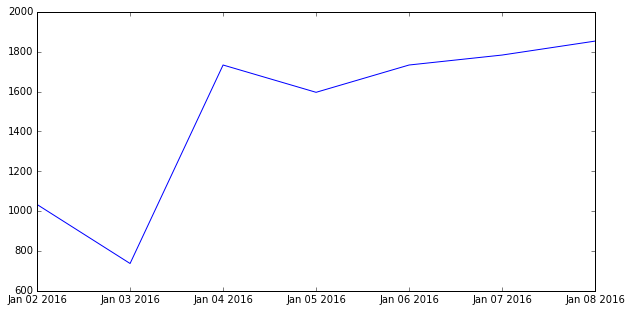

In [333]:
%matplotlib inline
import matplotlib.pyplot as plt

# If I just plot one turnstile (making sure to sort by date)
my_turnstile = sorted(count_dict[('A002', 'R051', '02-00-00', '59 ST')])

dates = [x[0] for x in my_turnstile]
counts = [x[1] for x in my_turnstile]

plt.figure(figsize=(10,5))
plt.plot(dates, counts)